<a href="https://colab.research.google.com/github/samyuktakhadka/WeeklyWorkshop/blob/main/SamyuktaKKhadka_Wrokshop5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9121 - loss: 0.2842 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9856 - loss: 0.0448 - val_accuracy: 0.9887 - val_loss: 0.0329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9919 - loss: 0.0272 - val_accuracy: 0.9850 - val_loss: 0.0476
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9919 - loss: 0.0228 - val_accuracy: 0.9874 - val_loss: 0.0439
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9905 - val_loss: 0.0296
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0368
Test accuracy: 0.9905
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


Implement an End to End CNN Model for Image Classification Task.

1.   List item
2.   List item



In this exercise, you will build and train a Convolutional Neural Network to classify fruits in Amazon
using TensorFlow and Keras.

**Task 1: Data Understanding and Visualization:**

In [3]:
!unzip /content/FruitinAmazon.zip

Archive:  /content/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train

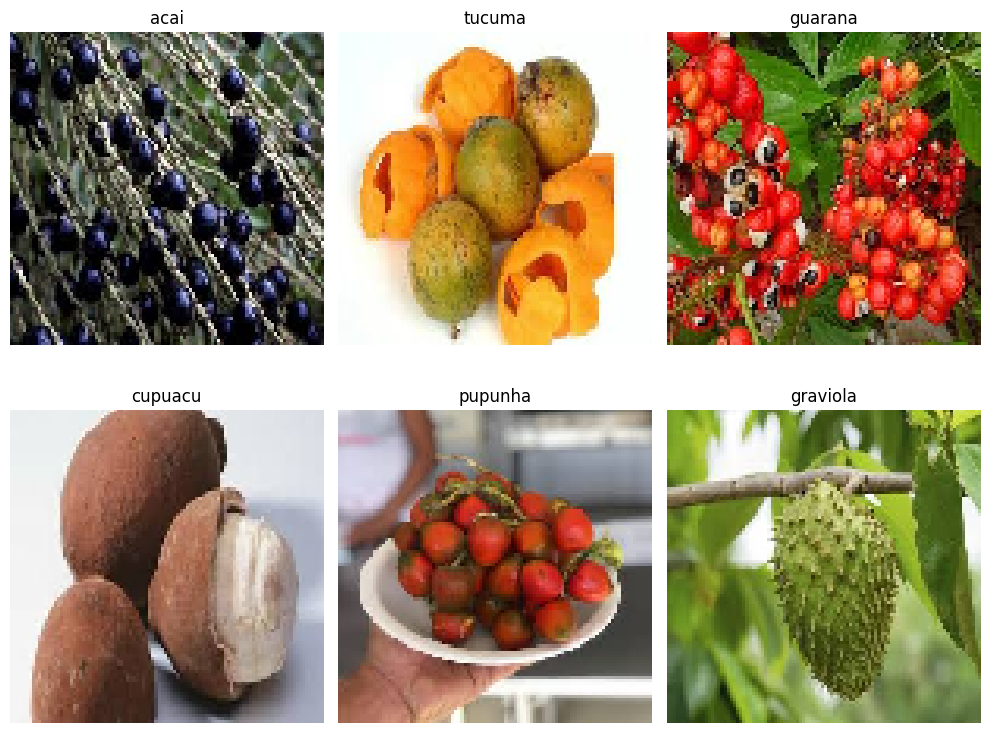

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

train_dir = '/content/FruitinAmazon/train'

# Get the list of class directories from the train folder
class_dirs = os.listdir(train_dir)

# Select one image randomly from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_files = os.listdir(class_path)
        selected_image_file = random.choice(image_files)  # Select a random image file
        image_path = os.path.join(class_path, selected_image_file)
        selected_images.append((class_dir, image_path))

# Plotting the selected images in a grid format with 2 rows
num_classes = len(class_dirs)
fig, axes = plt.subplots(nrows=2, ncols=(num_classes + 1) // 2, figsize=(10, 8))

# Flatten axes for easy indexing
axes = axes.flatten()

for idx, (class_name, img_path) in enumerate(selected_images):
    img = image.load_img(img_path, target_size=(100, 100))  # Load the image
    img_array = image.img_to_array(img) / 255.0  # Convert image to array and normalize
    axes[idx].imshow(img_array)
    axes[idx].axis('off')  # Turn off axis
    axes[idx].set_title(class_name)  # Set title to the class name

# Show the images in a grid format
plt.tight_layout()
plt.show()


• What did you Observe?

The output reveals a grid of randomly selected images from each class in the dataset, with each image labeled by its respective class. Since the images are resized to 100x100 pixels, some may appear slightly distorted, particularly if their original aspect ratios differ.

The random selection of images means they might not fully represent the diversity or key features of each class. Additionally, the number of images in each class could vary, which may affect the overall balance in the display. Overall, the grid provides a clear, organized view of the dataset, but the random sampling might not capture all the variations within each class.

Check for Corrupted Image:

In [5]:
corrupted_images = []

# Iterate through each class subdirectory
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)

    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            try:
                # Attempt to open the image to check for corruption
                with Image.open(image_path) as img:
                    img.verify()  # Verify the image integrity (doesn't load image fully)
            except (IOError, SyntaxError) as e:
                # If an error occurs, the image is corrupted
                corrupted_images.append(image_path)
                os.remove(image_path)  # Remove the corrupted image
                print(f"Removed corrupted image: {image_path}")

# If no corrupted images were found
if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


Task 2: Loading and Preprocessing Image Data in keras:

In [6]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',          # Labels are inferred from subdirectory names
    label_mode='int',           # Labels are encoded as integers
    image_size=(img_height, img_width),  # Resize images to (128, 128)
    interpolation='nearest',    # Resize interpolation method
    batch_size=batch_size,      # Number of samples per batch
    shuffle=True,               # Shuffle training data
    validation_split=validation_split,  # Split data for validation
    subset='training',          # Use this subset for training
    seed=123                    # Seed for reproducibility
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',          # Labels are inferred from subdirectory names
    label_mode='int',           # Labels are encoded as integers
    image_size=(img_height, img_width),  # Resize images to (128, 128)
    interpolation='nearest',    # Resize interpolation method
    batch_size=batch_size,      # Number of samples per batch
    shuffle=False,              # Don't shuffle validation data
    validation_split=validation_split,  # Split data for validation
    subset='validation',        # Use this subset for validation
    seed=123                    # Seed for reproducibility
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Verify by printing out a few samples
for images, labels in train_ds.take(1):  # Take 1 batch from the train dataset
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Image batch shape: (32, 128, 128, 3)
Label batch shape: (32,)


Task 3 - Implement a CNN with

Convolutional Architecture:

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model based on the provided structure
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))

    # Pooling Layer 1
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Convolutional Layer 2
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))

    # Pooling Layer 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected (Dense) Layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer (Number of neurons = number of classes)
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = (128, 128, 3)  # Assuming the images are of size 128x128 with 3 channels (RGB)
num_classes = 10  # Number of classes in the dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary to verify the architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Fully Connected Network Architecture:

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with fully connected layers
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))

    # Pooling Layer 1
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Convolutional Layer 2
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))

    # Pooling Layer 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Flatten Layer: Flatten the input coming from the convolutional layers
    model.add(layers.Flatten())

    # Fully Connected (Dense) Layers
    model.add(layers.Dense(64, activation='relu'))  # Hidden Layer 1: 64 neurons
    model.add(layers.Dense(128, activation='relu')) # Hidden Layer 2: 128 neurons

    # Output Layer: Number of neurons = number of classes
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = (128, 128, 3)  # Assuming the images are of size 128x128 with 3 channels (RGB)
num_classes = 10  # Number of classes in the dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary to verify the architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Task 4: Compile the Model

In [9]:
# Compile the model with the chosen optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',  # Optimizer (Adam is generally a good choice)
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric to track the accuracy during training and evaluation
)

# Example of training the model
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=10  # Number of epochs for training
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1467 - loss: 2.3832 - val_accuracy: 0.0000e+00 - val_loss: 4.2003
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1940 - loss: 2.1604 - val_accuracy: 0.0000e+00 - val_loss: 2.3530
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3455 - loss: 1.8271 - val_accuracy: 0.1667 - val_loss: 1.7514
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3793 - loss: 1.7094 - val_accuracy: 0.0000e+00 - val_loss: 1.7961
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4401 - loss: 1.5055 - val_accuracy: 0.1667 - val_loss: 1.7367
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5530 - loss: 1.1656 - val_accuracy: 0.5000 - val_loss: 1.1328
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7352 - loss: 0.9422 - val_accuracy: 0.6667 - val_loss: 0.9984
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8160 - loss: 0.7134 - val_accuracy: 0.8889 - val_los

Task 5: Train the Model

In [10]:
import tensorflow as tf

# Set the batch size and number of epochs
batch_size = 16
epochs = 250

# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',  # Path where the best model will be saved
        save_best_only=True,  # Save only the best model based on validation performance
        monitor='val_accuracy',  # Monitor validation accuracy to track the best model
        mode='max',  # Save the model with the maximum validation accuracy
        verbose=1  # Print a message when the model is saved
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=10,  # Stop training if no improvement after 10 epochs
        restore_best_weights=True,  # Restore the weights of the best model
        verbose=1  # Print a message when training stops early
    )
]

# Train the model using model.fit()
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs,  # Number of epochs
    batch_size=batch_size,  # Batch size
    callbacks=callbacks  # List of callbacks to use during training
)

# Optionally, you can print the final training history
print(f"Training completed. Best validation accuracy: {max(history.history['val_accuracy'])}")


Epoch 1/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9688 - loss: 0.2942
Epoch 1: val_accuracy improved from -inf to 0.72222, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9566 - loss: 0.3135 - val_accuracy: 0.7222 - val_loss: 0.5806
Epoch 2/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8438 - loss: 0.3274
Epoch 2: val_accuracy improved from 0.72222 to 0.94444, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8850 - loss: 0.2937 - val_accuracy: 0.9444 - val_loss: 0.3712
Epoch 3/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9688 - loss: 0.1640
Epoch 3: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9813 - loss: 0.1817 - val_accuracy: 0.8333 - val_loss: 0.6834
Epoch 4/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9375 - loss: 0.1775
Epoch 4: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9410 - loss: 0.1933 - val_accuracy: 0.8333 - val_loss: 0.6746
Epoch 5/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9062 - loss: 0.2473
Epoch 5: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9440 - loss: 0.1884 - val_accuracy: 0.8333 - val_loss: 0.4232
Epoch 6/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9688 - loss: 0.1274
Epoch 6: val_accuracy did not improve from 0.94444
3/3

Task 6: Evaluate the Model


In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(val_ds)  # Use the validation set or test set as applicable

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9444 - loss: 0.3712
Test Loss: 0.37122318148612976
Test Accuracy: 0.9444444179534912


Task 6: Save and Load the Model


In [12]:
# Save the model to a file
model.save('fruit_classification_model.h5')  # Save the model as 'fruit_classification_model.h5'

print("Model saved successfully!")


Model saved successfully!


In [13]:
# Load the saved model
loaded_model = tf.keras.models.load_model('fruit_classification_model.h5')

# Evaluate the loaded model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(val_ds)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step - accuracy: 0.9444 - loss: 0.3712
Test Loss: 0.37122318148612976
Test Accuracy: 0.9444444179534912


Task 7: Predictions and Classification Report



In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the class probabilities for the test/validation set
predictions = loaded_model.predict(val_ds)  # Using the loaded model to make predictions

# Convert the predicted probabilities to class labels (digit labels)
predicted_labels = np.argmax(predictions, axis=-1)  # Get the index of the highest probability

# Get the true labels from the validation dataset
true_labels = np.concatenate([y for _, y in val_ds], axis=0)  # Flatten the true labels from the validation dataset

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
              precision    recall  f1-score   support

           4       1.00      0.67      0.80         3
           5       0.94      1.00      0.97        15

    accuracy                           0.94        18
   macro avg       0.97      0.83      0.88        18
weighted avg       0.95      0.94      0.94        18



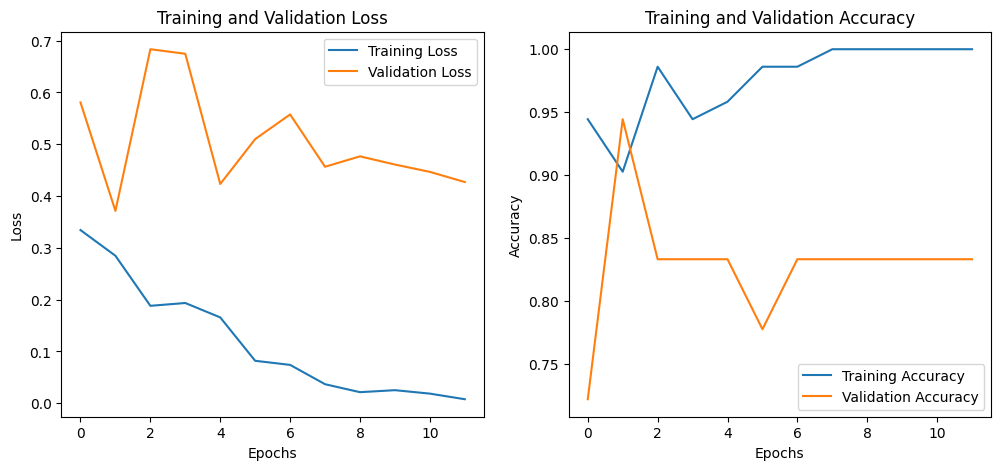

In [15]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Loss/Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [16]:
# Save the trained model to an .h5 file
model.save('fruit_classification_model.h5')


Conclusion